[[69  1  2 ...  2  2  2]
 [74  2  1 ...  2  2  2]
 [59  1  1 ...  2  1  2]
 ...
 [58  2  1 ...  1  1  2]
 [67  2  1 ...  2  1  2]
 [62  1  1 ...  1  2  1]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1]
[[ 6  4]
 [ 2 66]]
68
accuracy
0.9230769230769231


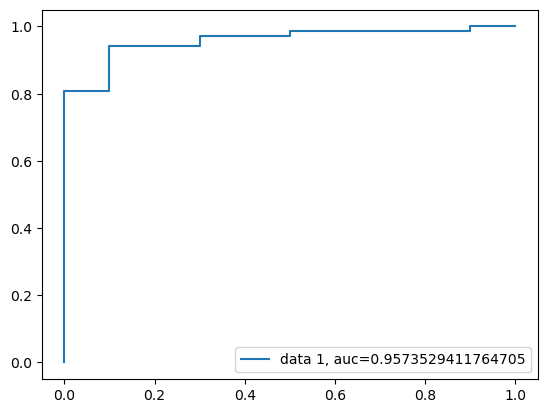

[       nan 1.         1.         1.         1.         1.
 1.         1.         1.         0.88996764 0.9039548  0.75829384
 0.76388889 0.66       0.66336634 0.62152134 0.55189456 0.5226209
 0.52631579 0.5       ]
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.98360656 0.98360656 0.95238095
 0.95238095 0.92307692 0.92307692 0.90909091 0.88235294 0.86956522
 0.86956522 0.85714286]
[1.         0.99270073 0.96453901 0.95104895 0.86075949 0.85
 0.7311828  0.72340426 0.71204188 0.71204188 0.68       0.68
 0.67326733 0.67326733 0.66995074 0.66995074 0.66995074 0.66995074
 0.66666667 0.66666667]
________________
6
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.1 0.3 0.3 0.5 0.5 0.6 0.8 0.9
 0.9 1. ]
[0.         0.01470588 0.07352941 0.10294118 0.32352941 0.35294118
 0.73529412 0.76470588 0.80882353 0.80882353 0.94117647 0.94117647
 0.97058824 0.97058824 0.98529412 0.98529412 0.98529412 0.98529412
 1.         1.        ]
2
________________


In [15]:

#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import metrics

dataset = pd.read_csv('E:\pg project\survey lung cancer.csv')

dataset['LUNG_CANCER']=dataset['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
x = dataset.iloc[:,1:15].values
y= dataset.iloc[:,-1].values
print(x)

# Split the data into Training and Testing set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

print(y_pred)

# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

print(cm)

print(sum(y_test))

import numpy as np
from sklearn.metrics import accuracy_score
print('accuracy')
print(accuracy_score(y_test, y_pred))

TN = cm [0,0]
FP = cm [0,1]
TP = cm [1,1]
FN = cm [1,0]


''' Plotting ROC Curve '''

y_pred = classifier.predict_proba(x_test)[::,1]
FP, TP, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(FP,TP,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

''' ----------------------  '''


sensetivity = TP/(TP+FP)  
speciticity = TN/(TN+FP)   
false_neg_rate=FN/(FN+TP)

print (sensetivity)
print (speciticity)
print (false_neg_rate)

print("________________")
print(TN)
print(FP)
print(TP)
print(FN)
print("________________")

In [12]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from pandas import DataFrame

# Load dataset
dataset = pd.read_csv('E:\pg project\survey lung cancer.csv')

# Convert 'LUNG_CANCER' column from 'YES'/'NO' to 1/0
dataset['LUNG_CANCER'] = dataset['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

# Select the columns you're interested in
df = DataFrame(dataset, columns=['SMOKING', 'YELLOW_FINGERS', 'LUNG_CANCER'])

# Features (X) and target variable (Y)
X = df[['SMOKING', 'YELLOW_FINGERS']]
Y = df['LUNG_CANCER']

# ---- Using Scikit-Learn (Linear Regression) ----

# Create a linear regression model
regr = linear_model.LinearRegression()

# Fit the model to the data
regr.fit(X, Y)

# Print the model's intercept and coefficients
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# Make predictions
Predicted_vals = regr.predict(X)

# Print the R^2 score
print('The R^2 score is: ')
print(r2_score(Y, Predicted_vals))

# Prediction with specific values (SMOKING = 2, YELLOW_FINGERS = 2)
SMOKING = 2
YELLOW_FINGERS = 2
print('Predicted CANCER: \n', regr.predict([[SMOKING, YELLOW_FINGERS]]))

# ---- Using Statsmodels (OLS Regression) ----
# Add constant term for intercept in OLS model
X_with_const = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X_with_const).fit()

# Make predictions using the statsmodels model
predictions = model.predict(X_with_const)

# Print the summary of the statsmodels regression
print("\nStatsmodels OLS Regression Summary:")
print(model.summary())



Intercept: 
 0.6182833413149688
Coefficients: 
 [0.0407322 0.1222202]
The R^2 score is: 
0.03658412782490095
Predicted CANCER: 
 [0.94418813]

Statsmodels OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:            LUNG_CANCER   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     5.810
Date:                Tue, 19 Nov 2024   Prob (F-statistic):            0.00334
Time:                        22:19:07   Log-Likelihood:                -92.068
No. Observations:                 309   AIC:                             190.1
Df Residuals:                     306   BIC:                             201.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    st